# Pymaceuticals Inc.
---

### Analysis

- .
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count = len(mouse_results["Mouse ID"].unique())
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
id_time = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
id_time

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = 'g989'
dup_mouse_df = mouse_results.loc[mouse_results["Mouse ID"] == dup_mouse]
dup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_clean = mouse_results.drop([908, 910, 912, 914, 916, 918, 920])
mouse_results_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_results_clean_count = len(mouse_results_clean["Mouse ID"].unique())
mouse_results_clean_count

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_median = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_var = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_std = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_sem = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

In [9]:
# Assemble the resulting series into a single summary DataFrame.
drug_stats = pd.DataFrame({"mean": drug_mean, "median": drug_median, "var": drug_var, "std": drug_std, "sem":drug_sem})
drug_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.293055,50.446266,43.010971,6.558275,0.528481
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_stats = mouse_results_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
drug_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.293055  50.446266  43.010971  6.558275  0.528481
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

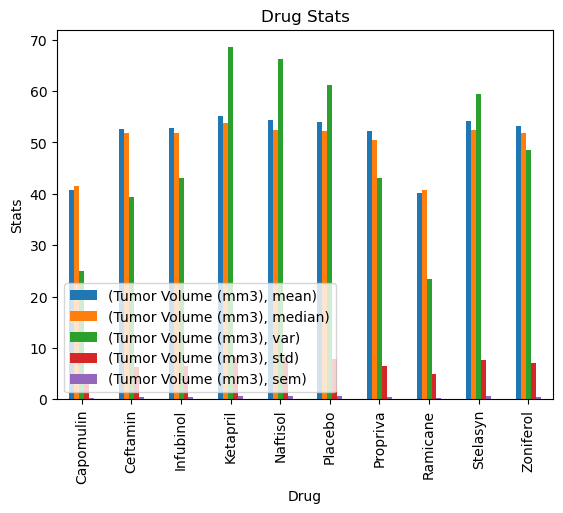

In [11]:
# make a drug_stats bar chart
drug_stats_bar = drug_stats.plot(kind='bar')
plt.title("Drug Stats")
plt.xlabel("Drug")
plt.ylabel("Stats")
plt.legend(loc=3)

## Bar and Pie Charts

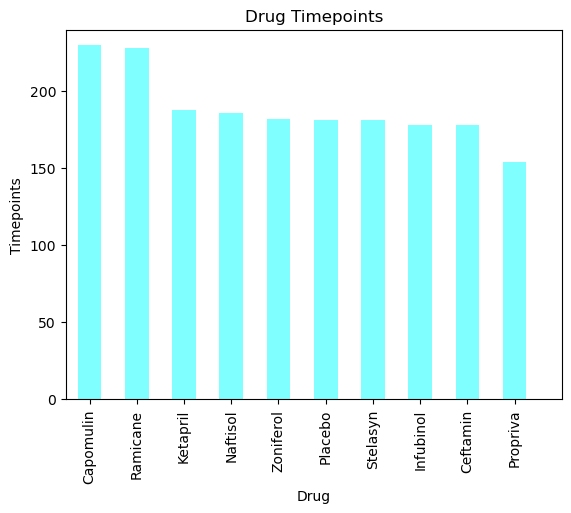

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_rows = mouse_results_clean['Drug Regimen'].value_counts()
drug_rows.plot(kind='bar', color = 'cyan', alpha=0.5, align="center")
plt.title("Drug Timepoints")
plt.xlabel('Drug')
plt.ylabel('Timepoints')
plt.xticks(rotation='vertical')
plt.xlim(-.5, len(drug_rows.index.values))
plt.ylim(0, max(drug_rows.values)+10)
plt.show()

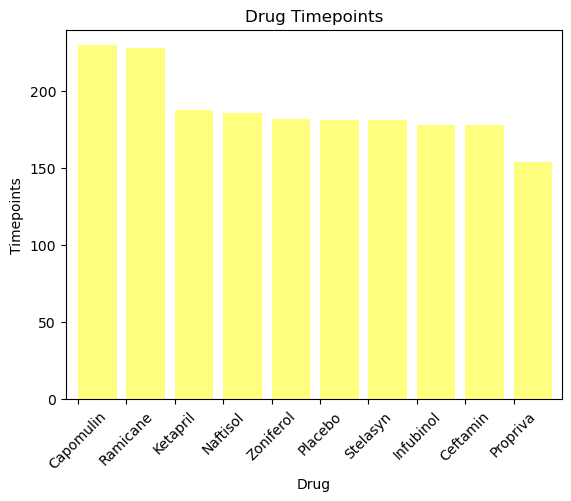

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.title('Total number of rows (Mouse ID/Timepoints) for each drug regimen')
plt.bar(drug_rows.index.values, drug_rows.values, color='yellow', alpha=0.5, align="edge")
plt.title("Drug Timepoints")
plt.xlabel('Drug')
plt.ylabel('Timepoints')
plt.xticks(rotation=45)
plt.xlim(-0.25, len(drug_rows.index.values))
plt.ylim(0, max(drug_rows.values)+10)
plt.show()

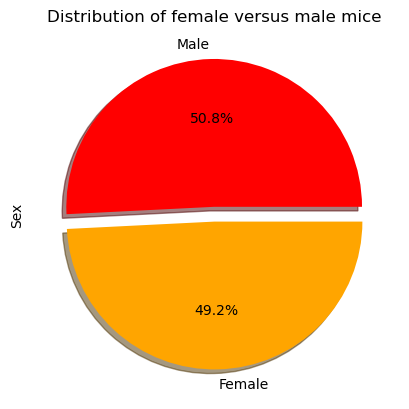

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mouse = mouse_results_clean["Sex"].value_counts()
colors = ['red','orange']
gender_mouse_pd = gender_mouse.plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, title='Distribution of female versus male mice')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

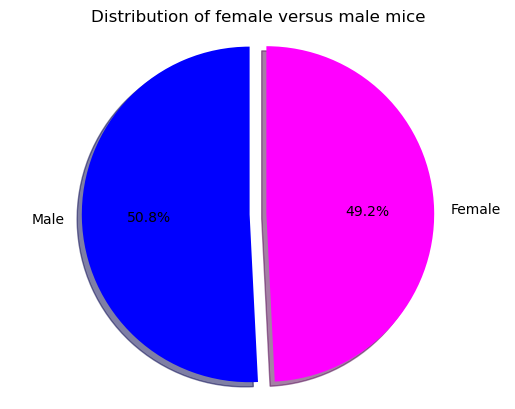

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ['Male', 'Female']
colors = ['blue', 'magenta']
plt.title('Distribution of female versus male mice')
plt.pie(gender_mouse, labels=genders, autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, startangle=90)
plt.axis('equal')
plt.show

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = mouse_results_clean.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor_volume = final_tumor_volume.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_with_final = final_tumor_volume.merge(mouse_results_clean, on=['Mouse ID', 'Timepoint'])

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mouse_drug_tumor_volume = clean_with_final.loc[clean_with_final['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(mouse_drug_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = mouse_drug_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f'Stats for {treatment}:')
    print(f'The lower quartile of temperatures is: {lowerq}')
    print(f'The upper quartile of temperatures is: {upperq}')
    print(f'The interquartile range of temperatures is: {iqr}')
    print(f'The the median of temperatures is: {quartiles[0.5]} ')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Values below {lower_bound} could be outliers.')
    print(f'Values above {upper_bound} could be outliers.')

Stats for Capomulin:
The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Stats for Ramicane:
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Stats for Infubinol:
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Stats for Ceft

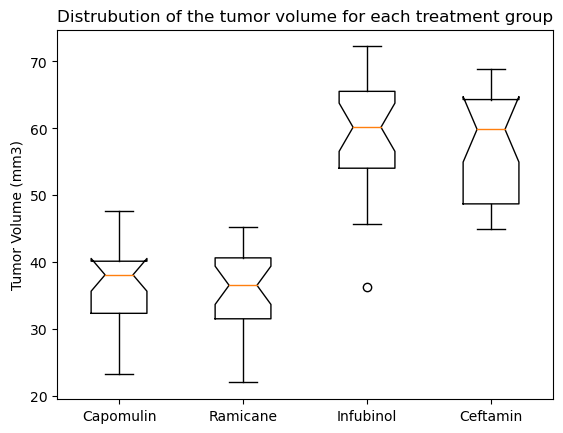

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, notch=True, vert=True, labels=treatments)
ax1.set_title('Distrubution of the tumor volume for each treatment group')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Identify the right mouse
cap_mouse = mouse_results_clean.loc[mouse_results_clean['Drug Regimen']=='Capomulin']
cap_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


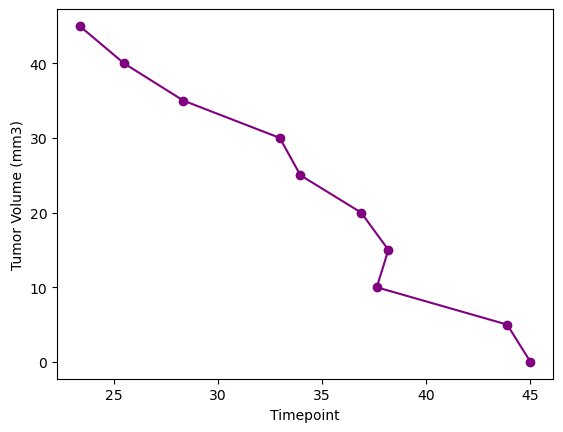

In [28]:
# Plot the line graph
my_mouse = mouse_results_clean.loc[mouse_results_clean['Mouse ID']=='s185']
cap = my_mouse.loc[my_mouse['Drug Regimen']=='Capomulin']
x = cap['Tumor Volume (mm3)']
y = cap['Timepoint']
plt.plot(x, y, color='purple', marker='o')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.show()

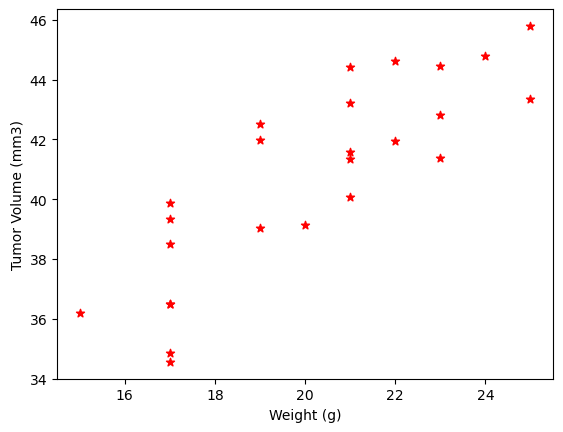

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_all = mouse_results_clean.loc[mouse_results_clean['Drug Regimen']=='Capomulin']
scat_mean = cap_all.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(scat_mean['Weight (g)'], scat_mean['Tumor Volume (mm3)'], color='r', marker = "*")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

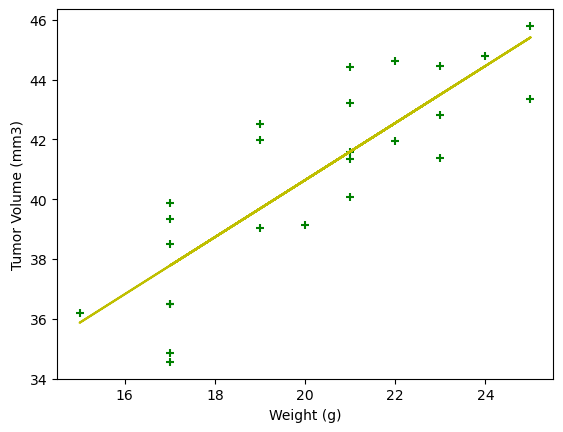

In [22]:
# Copy the scatter plot 
cap_scat = mouse_results_clean.loc[mouse_results['Drug Regimen']=="Capomulin"]
scat_mean = cap_scat.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(scat_mean['Weight (g)'], scat_mean['Tumor Volume (mm3)'], color='green', marker = "+")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r, p, se = stats.linregress(scat_mean['Weight (g)'], scat_mean['Tumor Volume (mm3)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = scat_mean['Weight (g)'] * slope + intercept
plt.plot(scat_mean['Weight (g)'],regress_values,"y-")

In [27]:
correlation = stats.pearsonr(scat_mean['Weight (g)'],scat_mean['Tumor Volume (mm3)'])
correlation

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)